In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [6]:
gameweek = pd.read_csv('/Users/nduqwele/Code/GithubProjects/Fantasy-Premier-League/data/2021-22/gws/merged_gw.csv')
pd.set_option("display.max_columns",None)
sns.set_theme() # To apply basic seaborn theme



In [8]:
gameweek


,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,6,0,0,0.0,0.0,2021-08-14T11:30:00Z,0,10,0,0,0,0,1,0,9363,1,5,0.0,0,0,0,0,50,True,0,1
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,18,0,0,0,0,1,0,169789,2,3,0.0,0,0,0,0,45,False,0,1
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,2,0,0,0,0,1,0,4092,2,3,0.0,0,0,0,0,45,True,0,1
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,4,3,0,5.2,21.6,2021-08-14T14:00:00Z,90,8,0,0,0,0,1,0,299682,1,3,0.0,2,0,0,0,65,False,0,1
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24560,Wilfred Ndidi,MID,Leicester,0.0,0,0,0,0,0.0,216,377,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,16,0,0,0,0,38,0,70366,1,4,0.0,0,-202,22,224,48,True,0,38
24561,Matt Ritchie,DEF,Newcastle,0.9,0,0,3,0,0.0,292,374,0,0,0.0,0.0,2022-05-22T15:00:00Z,1,5,0,0,0,0,38,0,15999,2,1,0.0,1,143,396,253,49,False,0,38
24562,Nathan Redmond,MID,Southampton,3.4,0,0,5,0,0.0,336,377,3,0,0.0,0.0,2022-05-22T15:00:00Z,82,9,0,0,0,0,38,0,13856,1,4,0.0,2,455,683,228,59,False,0,38
24563,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,373,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,19,0,0,0,0,38,0,587,1,3,0.0,0,-2,0,2,45,True,0,38


In [3]:



DF_bestplayers = pd.DataFrame(columns=gameweek.columns)

# append a series of topperformers 
# the solution is to use a list!
list_appendedgames= []
for i in range(38): # we cycle the availabe gameweeks
     # for now I want all the best players in every position
    DF = gameweek[(gameweek['position']=='DEF') & (gameweek['GW']==i)].sort_values(by=['total_points'], ascending=False).head(10)
    list_appendedgames.append(DF)
    
    MID = (gameweek[(gameweek['position']=='MID') & (gameweek['GW']==i)].sort_values(by=['total_points'], ascending=False).head(10))
    list_appendedgames.append(MID)

    FWD = (gameweek[(gameweek['position']=='FWD') & (gameweek['GW']==i)].sort_values(by=['total_points'], ascending=False).head(6))
    list_appendedgames.append(FWD)

    GK = (gameweek[(gameweek['position']=='GK') & (gameweek['GW']==i)].sort_values(by=['total_points'], ascending=False).head(4))
    list_appendedgames.append(GK)

DF_bestplayers = pd.concat(list_appendedgames) # then we pull a list of all the items together pretty usefull



In [4]:
meanbestseason = DF_bestplayers[['GW','position','total_points']]
meanbestseason 

,GW,position,total_points
277,1,DEF,15
85,1,DEF,14
384,1,DEF,12
248,1,DEF,11
198,1,DEF,7
...,...,...,...
23151,36,FWD,8
23405,36,GK,10
23539,36,GK,8
23576,36,GK,7


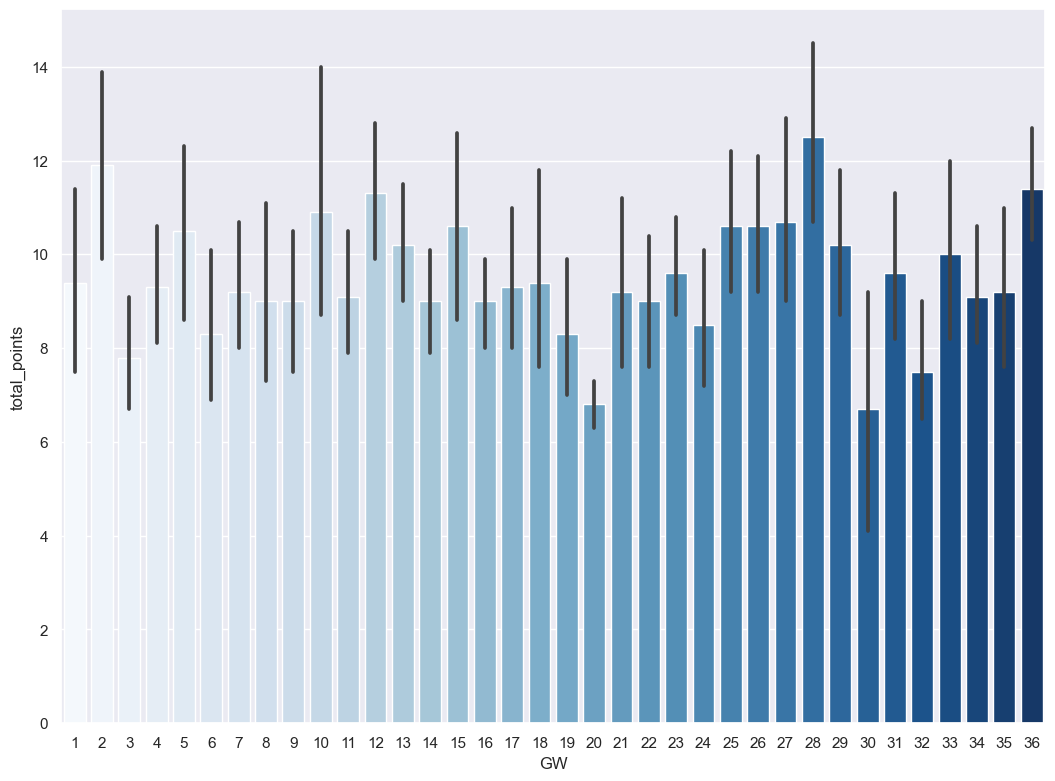

In [5]:

sns.set(rc={'figure.figsize':(12.7,9.27)}) # adjust figure size so we can see 
ax = sns.barplot(x="GW",y="total_points",data=DF_bestplayers[DF_bestplayers["position"]=='DEF'], palette="Blues")

In [7]:
#so let us plot our data nicely
# following this tut -> https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

fig, ax = plt.subplots(4,1, sharey=True) # we add dimensions here of how the plots should look like.
sns.color_palette("rocket")
# we can share x and y axis, nice :)!
fig.suptitle("Top player performances")
# remember there is some additional axis chagnes we need in the data to make sure we are gucci.
#goalkeepeers
sns.barplot(ax=ax[0], x="GW",y="total_points",data=DF_bestplayers[DF_bestplayers["position"]=='DEF'])
ax[0].set_title("Goalkeepers")
#defenders
sns.barplot(ax=ax[1], x="GW",y="total_points",data=DF_bestplayers[DF_bestplayers["position"]=='DEF'])
ax[1].set_title("Defender")
#midfilders
sns.barplot(ax=ax[2],x="GW",y="total_points",data=DF_bestplayers[DF_bestplayers["position"]=='MID'] )
ax[2].set_title("Midfielders")
#forwards
sns.barplot(ax=ax[3],x="GW",y="total_points",data=DF_bestplayers[DF_bestplayers["position"]=='FWD'])
ax[3].set_title("Forwards")

NameError: name 'plt' is not defined

In [8]:
meanbestseason

,GW,position,total_points
277,1,DEF,15
85,1,DEF,14
384,1,DEF,12
248,1,DEF,11
198,1,DEF,7
...,...,...,...
23151,36,FWD,8
23405,36,GK,10
23539,36,GK,8
23576,36,GK,7


In [24]:
# lets generate a team
#conditions

# gameweek[gameweek['position']=='DEF']
GW_DEF = gameweek[(gameweek['position']=='DEF') & (gameweek['GW']==1)]
n_players =len(GW_DEF)
n_players =GW_DEF['name']

n_players



0                    Eric Bailly
8                   Paul Dummett
12                    Willy Boly
13     José Diogo Dalot Teixeira
17                Jamal Baptiste
                 ...            
540              Aaron Cresswell
543           Federico Fernández
546              Mohammed Salisu
550                 Matt Ritchie
553              Ryan Fredericks
Name: name, Length: 189, dtype: object

In [30]:
np.random.choice(n_players,5,replace=False)

array(['Jarrad Branthwaite', 'Nathan Collins', 'Lucas Digne',
       'Kristoffer Ajer', 'Ricardo Domingos Barbosa Pereira'],
      dtype=object)

In [31]:
# we can finally choose the numver of players randomly.  which is good for now, we are condintioning by gameweek and by position. 

GW_DEF.loc[GW_DEF['name'].isin(np.random.choice(n_players,5,replace=False))]

# we also need to evaluate quickly wahat is there total score too.

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
111,Joseph Gomez,DEF,Liverpool,3.2,0,0,0,0,0.0,238,7,0,0,0.0,0.0,2021-08-14T16:30:00Z,0,15,0,0,0,0,1,0,52503,3,0,0.0,0,0,0,0,50,False,0,1
231,Emil Krafth,DEF,Newcastle,0.7,0,0,10,0,1.3,303,9,4,0,1.5,9.4,2021-08-15T13:00:00Z,84,19,0,0,0,0,1,0,4670,4,2,4.0,0,0,0,0,45,True,0,1
475,Javier Manquillo,DEF,Newcastle,0.0,0,0,0,0,0.0,302,9,0,0,0.0,0.0,2021-08-15T13:00:00Z,0,19,0,0,0,0,1,0,688449,4,2,0.0,0,0,0,0,40,True,0,1
494,Joe Rodon,DEF,Spurs,1.2,0,0,0,0,0.0,374,10,0,0,0.0,0.0,2021-08-15T15:30:00Z,0,12,0,0,0,0,1,0,8844,0,1,0.0,0,0,0,0,45,True,0,1
526,Sead Kolasinac,DEF,Arsenal,2.7,0,0,0,0,0.0,11,1,0,0,0.0,0.0,2021-08-13T19:00:00Z,0,3,0,0,0,0,1,0,9282,0,2,0.0,0,0,0,0,45,False,0,1
